In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os


#dataset = 'G:/Other computers/My_Laptop/Objective_1/Semantic Segmentation - U - Net/Efficient_Net_Classification/I_Dataset/'
dataset_path = os.listdir('G:/Other computers/My_Laptop/Objective_1/Semantic Segmentation - U - Net/Efficient_Net_Classification/AI_Dataset/')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Chipping', 'Crater', 'Flank']
Types of classes labels found:  3


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('G:/Other computers/My_Laptop/Objective_1/Semantic Segmentation - U - Net/Efficient_Net_Classification/AI_Dataset/' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

     Labels                         image
0  Chipping   dataset_path/Chipping/6.jpg
1  Chipping  dataset_path/Chipping/12.jpg
2  Chipping  dataset_path/Chipping/18.jpg
3  Chipping  dataset_path/Chipping/24.jpg
4  Chipping  dataset_path/Chipping/30.jpg
     Labels                        image
3103  Flank  dataset_path/Flank/0995.png
3104  Flank  dataset_path/Flank/0996.png
3105  Flank  dataset_path/Flank/0997.png
3106  Flank  dataset_path/Flank/0998.png
3107  Flank  dataset_path/Flank/0999.png


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  3108
Chipping    1036
Crater      1036
Flank       1036
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'G:/Other computers/My_Laptop/Objective_1/Semantic Segmentation - U - Net/Efficient_Net_Classification/AI_Dataset/'
dataset_path = os.listdir('G:/Other computers/My_Laptop/Objective_1/Semantic Segmentation - U - Net/Efficient_Net_Classification/AI_Dataset/')

im_size = 300

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(3108, 300, 300, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Chipping' 'Chipping' 'Chipping' ... 'Flank' 'Flank' 'Flank']
[0 0 0 ... 2 2 2]


In [8]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2486, 300, 300, 3)
(2486, 1)
(622, 300, 300, 3)
(622, 1)


In [10]:
train_y = tf.keras.utils.to_categorical(train_y, 3)
test_y = tf.keras.utils.to_categorical(test_y, 3)

In [11]:
train_y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [12]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB3

NUM_CLASSES = 3
IMG_SIZE = 300
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB3(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [13]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=25, verbose=2)c

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, 3)                10788146  
                                                                 
Total params: 10,788,146
Trainable params: 10,700,843
Non-trainable params: 87,303
_________________________________________________________________
Epoch 1/25
78/78 - 1550s - loss: 1.3767 - accuracy: 0.6677 - 1550s/epoch - 20s/step
Epoch 2/25
78/78 - 1490s - loss: 0.4265 - accuracy: 0.8805 - 1490s/epoch - 19s/step
Epoch 3/25
78/78 - 1512s - loss: 0.1494 - accuracy: 0.9525 - 1512s/epoch - 19s/step
Epoch 4/25
78/78 - 1475s - loss: 0.0921 - accuracy: 0.9682 - 1475s/epoch - 19s/step
Epoch 5/25
78/78 - 1603s - loss: 0.2503 - accuracy: 0.9525 - 1603s/epoch - 21s/step
Epoch 6/25
78/78 - 1

In [14]:
from tensorflow.keras.models import load_model
model.save('Efficient_Aug_25-1epochs.hdf5')

In [15]:
from tensorflow.keras.models import load_model
my_model = load_model('Efficient_Aug_25-1epochs.hdf5', 
                      compile=False)

In [ ]:
preds = model.evaluate(test_x)

In [ ]:
preds

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [17]:
class_names = [0,1,2]

In [18]:
import numpy as np
rounded_labels=np.argmax(test_y, axis=1)
rounded_labels

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1,
       2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0,
       0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2,
       1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1,

In [19]:
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred

classifier = estimator(model, class_names)

C:\Users\Aitha Sudheer Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


20/20 [==============================] - 87s 4s/step


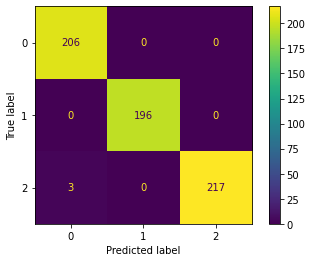

In [20]:
plot_confusion_matrix(estimator=classifier, X=test_x, y_true=rounded_labels)

In [21]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

20/20 [==============================] - 82s 4s/step - loss: 0.2093 - accuracy: 0.9952
Loss = 0.20925621688365936
Test Accuracy = 0.9951768517494202


In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
preds = model.evaluate(test_x, test_y)

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'G:/Other computers/My_Laptop/Objective_1/Semantic Segmentation - U - Net/Efficient_Net_Classification/I_Dataset/Flank/100.jpg'


img = cv2.imread(img_path)
img = cv2.resize(img, (300, 300))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(img)



preds=model.predict(x)
print("predicted class: ", preds )    # probabilities for being in each of the 3 classes

In [ ]:
from keras.utils import to_categorical
testY = to_categorical(test_y)